### Teste t√©cnico da √°rea de An√°lise de Dados

Mais detalhes vide README.md

**Etapas da an√°lise:**

1. Importa√ß√£o de bibliotecas
2. Leitura e pr√©-processamento dos dados
3. An√°lise explorat√≥ria geral
4. M√©tricas de Engajamento
5. M√©tricas de Desempenho
6. Padr√µes de Uso
7. Segmenta√ß√µes
8. Recomenda√ß√µes baseadas nos dados



In [29]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Configura√ß√£o para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:.2f}'.format

In [30]:
# Leitura do arquivo CSV
df_raw = pd.read_csv("Dados/Dados.csv", encoding='latin1', sep=';')
df_raw.head()


ID        Data      Hora   Regi√£o         Estudante       Curso  \
0   1  06/08/2023  08:28:21  Sudeste   Cintia Nogueira  Literatura   
1   2  05/08/2023  05:51:54  Sudeste      Caio Damasco      F√≠sica   
2   3  07/08/2023  10:46:16  Sudeste      Caio Damasco      F√≠sica   
3   4  14/08/2023  22:44:25    Norte       Yuri Kepler      F√≠sica   
4   5  08/08/2023  00:41:16    Norte  Daniel Dalembert  Literatura   

        Feature  Nota  
0     Simulados   5,9  
1        Ebooks     X  
2     Simulados  2,45  
3  Aulas Online     X  
4  Aulas Online     X

In [31]:
# Informa√ß√µes sobre o DataFrame
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         200 non-null    int64 
 1   Data       200 non-null    object
 2   Hora       200 non-null    object
 3   Regi√£o     200 non-null    object
 4   Estudante  200 non-null    object
 5   Curso      200 non-null    object
 6   Feature    200 non-null    object
 7   Nota       200 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.6+ KB


In [32]:
df_raw.isnull().sum()

ID           0
Data         0
Hora         0
Regi√£o       0
Estudante    0
Curso        0
Feature      0
Nota         0
dtype: int64

In [33]:
# Fazendo uma copia do DataFrame
df = df_raw.copy()

# Substituindo v√≠rgula por ponto e convertendo a coluna Nota
df["Nota"] = df["Nota"].str.replace(",", ".")
df["Nota"] = pd.to_numeric(df["Nota"], errors="coerce")

# Convertendo data e hora para um formato mais adequado
df["Data"] = pd.to_datetime(df["Data"], format="%d/%m/%Y")
df["Hora"] = pd.to_datetime(df["Hora"], format="%H:%M:%S").dt.time

# Criando novas colunas de dias da semana e hora do dia
df["Dia da Semana"] = df["Data"].dt.day_name()
df["Dia do M√™s"] = df["Data"].dt.day
df["Hora do Dia"] = df["Hora"].apply(lambda x: x.hour)

# Verificando o resultado
df.head()


ID       Data      Hora   Regi√£o         Estudante       Curso  \
0   1 2023-08-06  08:28:21  Sudeste   Cintia Nogueira  Literatura   
1   2 2023-08-05  05:51:54  Sudeste      Caio Damasco      F√≠sica   
2   3 2023-08-07  10:46:16  Sudeste      Caio Damasco      F√≠sica   
3   4 2023-08-14  22:44:25    Norte       Yuri Kepler      F√≠sica   
4   5 2023-08-08  00:41:16    Norte  Daniel Dalembert  Literatura   

        Feature  Nota Dia da Semana  Dia do M√™s  Hora do Dia  
0     Simulados  5.90        Sunday           6            8  
1        Ebooks   NaN      Saturday           5            5  
2     Simulados  2.45        Monday           7           10  
3  Aulas Online   NaN        Monday          14           22  
4  Aulas Online   NaN       Tuesday           8            0

In [34]:
# Verificando dados estat√≠sticos gerais do conjunto de dados
df.describe(include="all")

ID                 Data      Hora Regi√£o    Estudante       Curso  \
count  200.00                  200       200    200          200         200   
unique    NaN                  NaN       200      5           19           6   
top       NaN                  NaN  08:28:21  Norte  Yuri Kepler  Matem√°tica   
freq      NaN                  NaN         1     49           17          42   
mean   100.50  2023-08-15 05:52:48       NaN    NaN          NaN         NaN   
min      1.00  2023-08-01 00:00:00       NaN    NaN          NaN         NaN   
25%     50.75  2023-08-07 00:00:00       NaN    NaN          NaN         NaN   
50%    100.50  2023-08-15 00:00:00       NaN    NaN          NaN         NaN   
75%    150.25  2023-08-23 00:00:00       NaN    NaN          NaN         NaN   
max    200.00  2023-08-31 00:00:00       NaN    NaN          NaN         NaN   
std     57.88                  NaN       NaN    NaN          NaN         NaN   

             Feature  Nota Dia da Semana  Dia do M√™s  Hora do Dia  
count            200 93.00           200      200.00       200.00  
unique             4   NaN             7         NaN          NaN  
top     Aulas Online   NaN       Tuesday         NaN          NaN  
freq              60   NaN            36         NaN          NaN  
mean             NaN  4.69           NaN       15.24        12.54  
min              NaN  0.15           NaN        1.00         0.00  
25%              NaN  2.07           NaN        7.00         7.00  
50%              NaN  5.03           NaN       15.00        13.00  
75%              NaN  6.78           NaN       23.00        19.00  
max              NaN  9.90           NaN       31.00        23.00  
std              NaN  2.72           NaN        9.29         7.05

#### In√≠cio da an√°lise em busca de KPIs e M√©tricas relevantes

In [35]:
data_inicial = df["Data"].min()
data_final = df["Data"].max()
display(data_inicial, data_final)

Timestamp('2023-08-01 00:00:00')

Timestamp('2023-08-31 00:00:00')

In [36]:
df["Estudante"].unique()

array(['Cintia Nogueira', 'Caio Damasco', 'Yuri Kepler',
       'Daniel Dalembert', 'Polyana Hermes', 'Romero Trajano', 'H√©lio Jr',
       'Geovana Hiur', 'Ana Malu', 'Karol Alencar', 'Pedro Hon√≥rio',
       'J√∫lio Godoy', 'Renan Oliveira', 'Brunno Paiva', 'S√°vio Pedrosa',
       'Fernando Yuri', 'Kleiton Xavier', 'Lugano Diego', 'Mannu Cardoso'],
      dtype=object)

In [37]:
# Contagem de acessos por estudante
acessos_aluno = df["Estudante"].value_counts().reset_index()
acessos_aluno.columns = ["Estudante", "Total de Acessos"]
acessos_aluno.head()


Estudante  Total de Acessos
0       Yuri Kepler                17
1    Polyana Hermes                16
2  Daniel Dalembert                16
3          H√©lio Jr                15
4     S√°vio Pedrosa                14

In [38]:
# Verificando a frequ√™ncia m√©dia semanal com que cada aluno acessa o sistema
acessos_por_dia = df.groupby("Estudante")["Data"].nunique()
frequencia_semanal = acessos_por_dia / ((df["Data"].max() - df["Data"].min()).days / 7)
frequencia_semanal = frequencia_semanal.reset_index(name="Frequ√™ncia m√©dia semanal")
frequencia_semanal.head()


Estudante  Frequ√™ncia m√©dia semanal
0          Ana Malu                      2.33
1      Brunno Paiva                      1.40
2      Caio Damasco                      1.63
3   Cintia Nogueira                      1.40
4  Daniel Dalembert                      2.80

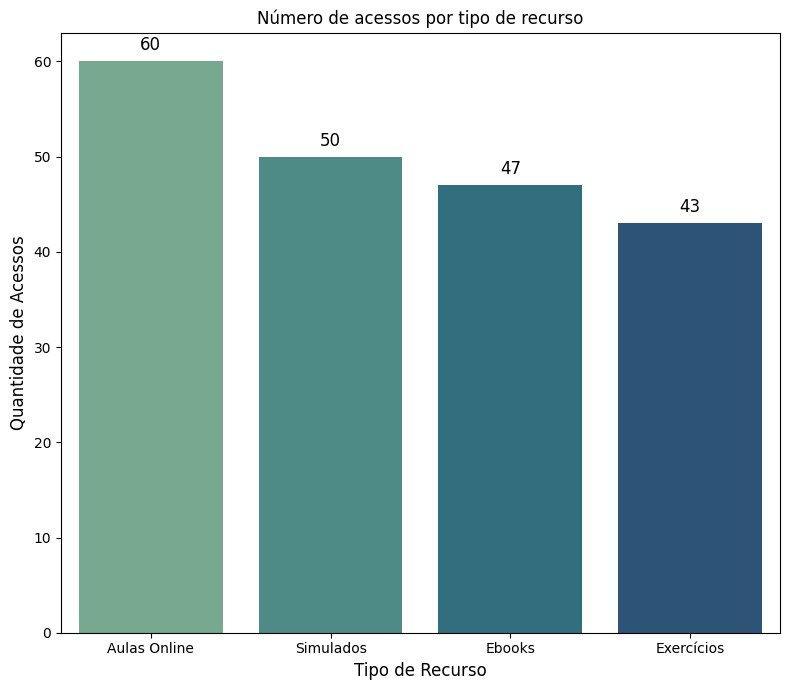

In [39]:
plt.figure(figsize=(8, 7))
ax = sns.countplot(data=df, x="Feature", order=df["Feature"].value_counts().index, palette="crest")
plt.title("N√∫mero de acessos por tipo de recurso", fontsize=12)
plt.xlabel("Tipo de Recurso", fontsize=12)
plt.ylabel("Quantidade de Acessos", fontsize=12)
plt.xticks(rotation=0, ha='center')

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=12, xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()



In [40]:
# Criando a tabela din√¢mica de acessos por curso e por regi√£o
pivot = pd.pivot_table(df, index="Curso", columns="Regi√£o", values="Estudante", aggfunc="count", fill_value=0)

# Adicionando uma linha "Total" com a soma por coluna (ou seja, total por regi√£o)
pivot.loc["Total"] = pivot.sum()

# Exibindo a tabela
pivot


Regi√£o                  Centro Oeste  Nordeste  Norte  Sudeste  Sul
Curso                                                              
Ci√™ncias da Computa√ß√£o             2         5     11        6    7
Engenharia Civil                   4         7      7        7    7
F√≠sica                             5         4      9       13    9
Hist√≥ria                           6         2      4        8    5
Literatura                         6         6      7        5    6
Matem√°tica                         6        10     11        7    8
Total                             29        34     49       46   42

In [41]:
# M√©dia de notas por curso, recurso e regi√£o
df_notas = df.dropna(subset=["Nota"])

media_curso = df_notas.groupby("Curso")["Nota"].mean().sort_values(ascending=False)
media_recurso = df_notas.groupby("Feature")["Nota"].mean().sort_values(ascending=False)
media_regiao = df_notas.groupby("Regi√£o")["Nota"].mean().sort_values(ascending=False)

#display("M√©dia por Curso:")
display(media_curso)
#display("\nM√©dia por Recurso:")
display(media_recurso)
#display("\nM√©dia por Regi√£o:")
display(media_regiao)


Curso
Ci√™ncias da Computa√ß√£o   5.44
Hist√≥ria                 5.08
Literatura               4.62
F√≠sica                   4.55
Engenharia Civil         4.47
Matem√°tica               3.88
Name: Nota, dtype: float64

Feature
Simulados    4.72
Exerc√≠cios   4.65
Name: Nota, dtype: float64

Regi√£o
Sudeste        5.69
Norte          5.02
Centro Oeste   4.99
Nordeste       4.28
Sul            3.15
Name: Nota, dtype: float64

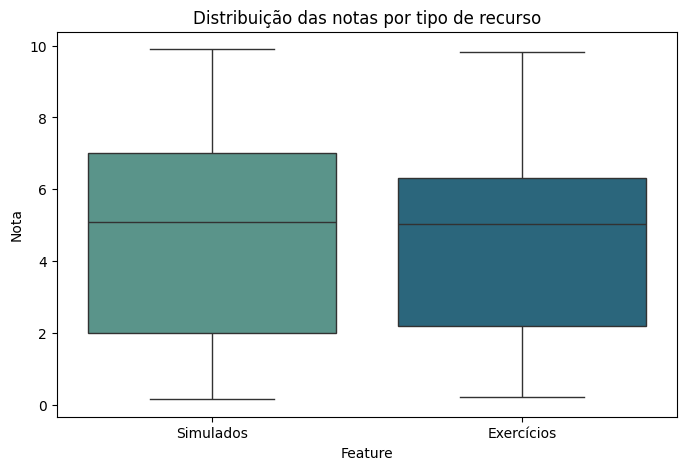

In [42]:
# Boxplot das notas por recurso
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_notas, x="Feature", y="Nota", palette="crest")
plt.title("Distribui√ß√£o das notas por tipo de recurso")
plt.xticks(rotation=0)
plt.show()


Simulados:

Apresentam uma mediana mais alta em compara√ß√£o aos demais recursos.

A caixa est√° mais concentrada em valores superiores, indicando que muitos alunos t√™m boas notas ao utilizar esse recurso.

Aulas Online:

A aus√™ncia de notas sugere que as aulas online n√£o s√£o utilizadas como crit√©rio de avalia√ß√£o.

Exerc√≠cios:

T√™m uma distribui√ß√£o mais larga, o que indica varia√ß√£o maior no desempenho dos alunos.

Existem alguns outliers para baixo, sugerindo que alguns alunos encontram dificuldade com esse tipo de recurso.

Ebooks:

Em muitos casos, aparecem com nota nula ou aus√™ncia de nota (representado por aus√™ncia de boxplot).

Isso sugere que os ebooks s√£o usados mais como recurso passivo, ao inv√©s de recurso avaliativo.



In [43]:
# Porcentagem de intera√ß√µes sem nota
sem_nota = df["Nota"].isna().sum()
total = len(df)
percentual_sem_nota = (sem_nota / total) * 100

print(f"{percentual_sem_nota:.2f}% das intera√ß√µes n√£o possuem nota (apenas acesso)")


53.50% das intera√ß√µes n√£o possuem nota (apenas acesso)


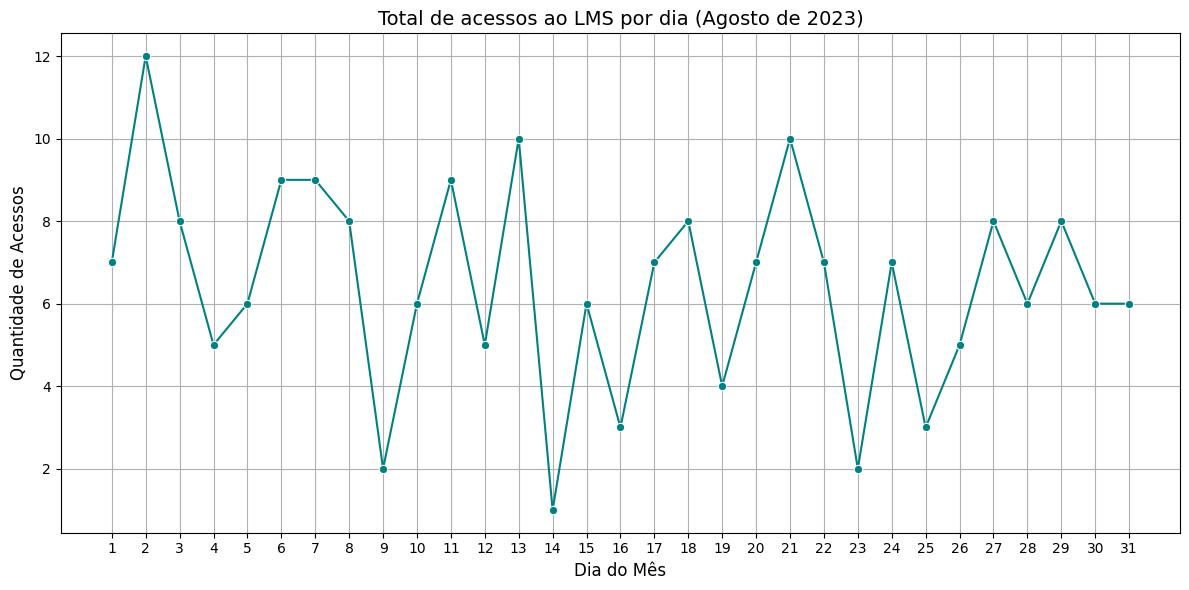

In [44]:
# Agrupando os dados por dia e contando os acessos
acessos_por_dia = df.groupby("Dia do M√™s").size().reset_index(name="Total de Acessos")

# Plotando o gr√°fico
plt.figure(figsize=(12, 6))
sns.lineplot(data=acessos_por_dia, x="Dia do M√™s", y="Total de Acessos", marker='o', color='teal')

# Formata√ß√£o do gr√°fico
plt.title("Total de acessos ao LMS por dia (Agosto de 2023)", fontsize=14)
plt.xlabel("Dia do M√™s", fontsize=12)
plt.ylabel("Quantidade de Acessos", fontsize=12)
plt.xticks(range(1, 32))
plt.grid(True)
plt.tight_layout()

plt.show()

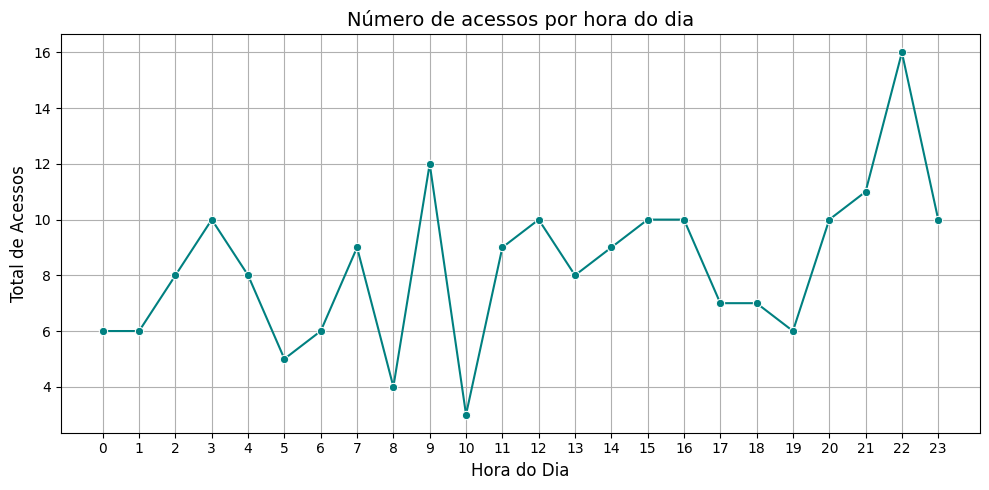

In [45]:
# Contagem de acessos por hora do dia (Hor√°rio de pico)
# Agrupando os acessos por hora do dia
acessos_por_hora = df.groupby("Hora do Dia").size().reset_index(name="Total de Acessos")

# Plotando o gr√°fico de linha
plt.figure(figsize=(10, 5))
sns.lineplot(data=acessos_por_hora, x="Hora do Dia", y="Total de Acessos", marker='o', color='teal')
plt.title("N√∫mero de acessos por hora do dia", fontsize=14)
plt.xlabel("Hora do Dia", fontsize=12)
plt.ylabel("Total de Acessos", fontsize=12)
plt.xticks(range(0, 24))  # Garante que todas as horas do dia apare√ßam no eixo X
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
# Contagem de acessos por recurso
df["Feature"].value_counts()

Feature
Aulas Online    60
Simulados       50
Ebooks          47
Exerc√≠cios      43
Name: count, dtype: int64

In [47]:
# Contagem de acessos por curso (engajamento)
curso_engajamento = df["Curso"].value_counts().reset_index()
curso_engajamento.columns = ["Curso", "Total de Acessos"]
curso_engajamento.head(10)


Curso  Total de Acessos
0              Matem√°tica                42
1                  F√≠sica                40
2        Engenharia Civil                32
3  Ci√™ncias da Computa√ß√£o                31
4              Literatura                30
5                Hist√≥ria                25

In [48]:
# Faixa de notas
df["Faixa de Nota"] = pd.cut(df["Nota"], bins=[0, 4, 7, 10], labels=["Baixa", "M√©dia", "Alta"])
df[["Estudante", "Nota", "Faixa de Nota"]].dropna().head()


Estudante  Nota Faixa de Nota
0   Cintia Nogueira  5.90         M√©dia
2      Caio Damasco  2.45         Baixa
5    Polyana Hermes  2.78         Baixa
9          Ana Malu  1.80         Baixa
11         Ana Malu  6.23         M√©dia

In [49]:
# Contagem de acessos por recurso e regi√£o
segmento = df.groupby(["Regi√£o", "Feature"]).size().reset_index(name="Total de Acessos")
segmento.sort_values(by="Total de Acessos", ascending=False).head(10)

Regi√£o       Feature  Total de Acessos
8      Norte  Aulas Online                16
13   Sudeste        Ebooks                15
11     Norte     Simulados                15
16       Sul  Aulas Online                15
14   Sudeste    Exerc√≠cios                12
12   Sudeste  Aulas Online                11
7   Nordeste     Simulados                11
17       Sul        Ebooks                11
4   Nordeste  Aulas Online                10
19       Sul     Simulados                10

In [50]:
# Agrupar por Regi√£o e Feature e contar os acessos
segmento = df.groupby(["Regi√£o", "Feature"]).size().reset_index(name="Total de Acessos")

# Ordenar dentro de cada Regi√£o pelos acessos em ordem decrescente
ranking = segmento.sort_values(["Regi√£o", "Total de Acessos"], ascending=[True, False])

# Adicionar coluna de ranking
ranking["Ranking"] = ranking.groupby("Regi√£o")["Total de Acessos"].rank(method="first", ascending=False).astype(int)

# Reordenar colunas para exibi√ß√£o
ranking = ranking[["Regi√£o", "Ranking", "Feature", "Total de Acessos"]]

# Exibir ranking completo ou top 5 por regi√£o
ranking_top5 = ranking[ranking["Ranking"] <= 5]

ranking_top5


Regi√£o  Ranking       Feature  Total de Acessos
0   Centro Oeste        1  Aulas Online                 8
1   Centro Oeste        2        Ebooks                 8
2   Centro Oeste        3    Exerc√≠cios                 7
3   Centro Oeste        4     Simulados                 6
7       Nordeste        1     Simulados                11
4       Nordeste        2  Aulas Online                10
6       Nordeste        3    Exerc√≠cios                 8
5       Nordeste        4        Ebooks                 5
8          Norte        1  Aulas Online                16
11         Norte        2     Simulados                15
10         Norte        3    Exerc√≠cios                10
9          Norte        4        Ebooks                 8
13       Sudeste        1        Ebooks                15
14       Sudeste        2    Exerc√≠cios                12
12       Sudeste        3  Aulas Online                11
15       Sudeste        4     Simulados                 8
16           Sul        1  Aulas Online                15
17           Sul        2        Ebooks                11
19           Sul        3     Simulados                10
18           Sul        4    Exerc√≠cios                 6

In [51]:
# Agrupar e contar os acessos por Regi√£o e Feature
segmento = df.groupby(["Regi√£o", "Feature"]).size().reset_index(name="Total de Acessos")

# Ordenar dentro de cada regi√£o por total de acessos (decrescente)
segmento = segmento.sort_values(["Regi√£o", "Total de Acessos"], ascending=[True, False])

# Adicionar coluna de ranking por Regi√£o
segmento["Ranking"] = segmento.groupby("Regi√£o")["Total de Acessos"].rank(method="first", ascending=False).astype(int)

# Reorganizar colunas
segmento = segmento[["Regi√£o", "Ranking", "Feature", "Total de Acessos"]]

# Gerar tabelas separadas por Regi√£o
regioes = segmento["Regi√£o"].unique()

for regiao in regioes:
    print(f"--- Ranking de Features na Regi√£o: {regiao} ---\n")
    display(segmento[segmento["Regi√£o"] == regiao].reset_index(drop=True))
    print("\n")


--- Ranking de Features na Regi√£o: Centro Oeste ---



Regi√£o  Ranking       Feature  Total de Acessos
0  Centro Oeste        1  Aulas Online                 8
1  Centro Oeste        2        Ebooks                 8
2  Centro Oeste        3    Exerc√≠cios                 7
3  Centro Oeste        4     Simulados                 6



--- Ranking de Features na Regi√£o: Nordeste ---



Regi√£o  Ranking       Feature  Total de Acessos
0  Nordeste        1     Simulados                11
1  Nordeste        2  Aulas Online                10
2  Nordeste        3    Exerc√≠cios                 8
3  Nordeste        4        Ebooks                 5



--- Ranking de Features na Regi√£o: Norte ---



Regi√£o  Ranking       Feature  Total de Acessos
0  Norte        1  Aulas Online                16
1  Norte        2     Simulados                15
2  Norte        3    Exerc√≠cios                10
3  Norte        4        Ebooks                 8



--- Ranking de Features na Regi√£o: Sudeste ---



Regi√£o  Ranking       Feature  Total de Acessos
0  Sudeste        1        Ebooks                15
1  Sudeste        2    Exerc√≠cios                12
2  Sudeste        3  Aulas Online                11
3  Sudeste        4     Simulados                 8



--- Ranking de Features na Regi√£o: Sul ---



Regi√£o  Ranking       Feature  Total de Acessos
0    Sul        1  Aulas Online                15
1    Sul        2        Ebooks                11
2    Sul        3     Simulados                10
3    Sul        4    Exerc√≠cios                 6

In [52]:
df.columns.to_list()


['ID',
 'Data',
 'Hora',
 'Regi√£o',
 'Estudante',
 'Curso',
 'Feature',
 'Nota',
 'Dia da Semana',
 'Dia do M√™s',
 'Hora do Dia',
 'Faixa de Nota']

In [53]:
# Total de acessos (linhas da base)
total_acessos = df.shape[0]

# Total de estudantes √∫nicos
total_estudantes = df['Estudante'].nunique()

# Total de recursos (features) √∫nicos
total_features = df['Feature'].nunique()

# Total de cursos √∫nicos
total_cursos = df['Curso'].nunique()

# Total de regi√µes √∫nicas
total_regioes = df['Regi√£o'].nunique()

# Total de avalia√ß√µes (notas n√£o nulas)
total_notas = df['Nota'].notna().sum()

# Nota m√©dia, m√≠nima e m√°xima
nota_media = round(df['Nota'].mean(), 2)
nota_minima = df['Nota'].min()
nota_maxima = df['Nota'].max()

# M√©dia de acessos por estudante
media_acessos_por_estudante = round(total_acessos / total_estudantes, 2)

# M√©dia de nota por estudante (apenas para quem tem nota)
media_nota_por_estudante = round(df.dropna(subset=['Nota']).groupby('Estudante')['Nota'].mean().mean(), 2)

# Quadro-resumo (como DataFrame para visualiza√ß√£o)
resumo = pd.DataFrame({
    'M√©trica': [
        'Total de acessos',
        'Total de estudantes',
        'Total de recursos (features)',
        'Total de cursos',
        'Total de regi√µes',
        'Total de avalia√ß√µes (notas)',
        'Nota m√©dia',
        'Nota m√≠nima',
        'Nota m√°xima',
        'M√©dia de acessos por estudante',
        'M√©dia de nota por estudante (com nota)'
    ],
    'Valor': [
        total_acessos,
        total_estudantes,
        total_features,
        total_cursos,
        total_regioes,
        total_notas,
        nota_media,
        nota_minima,
        nota_maxima,
        media_acessos_por_estudante,
        media_nota_por_estudante
    ]
})

resumo


M√©trica  Valor
0                         Total de acessos 200.00
1                      Total de estudantes  19.00
2             Total de recursos (features)   4.00
3                          Total de cursos   6.00
4                         Total de regi√µes   5.00
5              Total de avalia√ß√µes (notas)  93.00
6                               Nota m√©dia   4.69
7                              Nota m√≠nima   0.15
8                              Nota m√°xima   9.90
9           M√©dia de acessos por estudante  10.53
10  M√©dia de nota por estudante (com nota)   4.91

Correla√ß√£o entre total de acessos e m√©dia de notas: -0.328


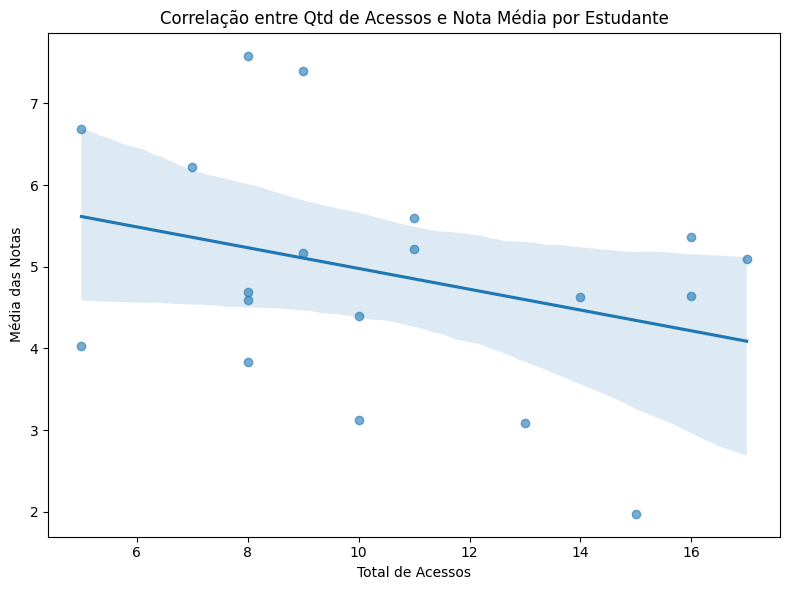

In [70]:
# Agrupar por estudante: total de acessos e m√©dia das notas
acessos_e_notas = df.groupby('Estudante').agg({
    'Feature': 'count',    # total de acessos
    'Nota': 'mean'         # m√©dia das notas
}).rename(columns={'Feature': 'Total Acessos', 'Nota': 'M√©dia Nota'})

# Visualizar correla√ß√£o
correlacao = acessos_e_notas.corr().loc['Total Acessos', 'M√©dia Nota']
print(f"Correla√ß√£o entre total de acessos e m√©dia de notas: {correlacao:.3f}")

# Visualizar a rela√ß√£o com scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(data=acessos_e_notas, x='Total Acessos', y='M√©dia Nota', scatter_kws={"alpha":0.6})
plt.title('Correla√ß√£o entre Qtd de Acessos e Nota M√©dia por Estudante')
plt.xlabel('Total de Acessos')
plt.ylabel('M√©dia das Notas')
plt.tight_layout()
plt.show()


O gr√°fico de regress√£o linear mostra que existe uma tend√™ncia de queda da nota conforme o aumento do n√∫mero de acessos.

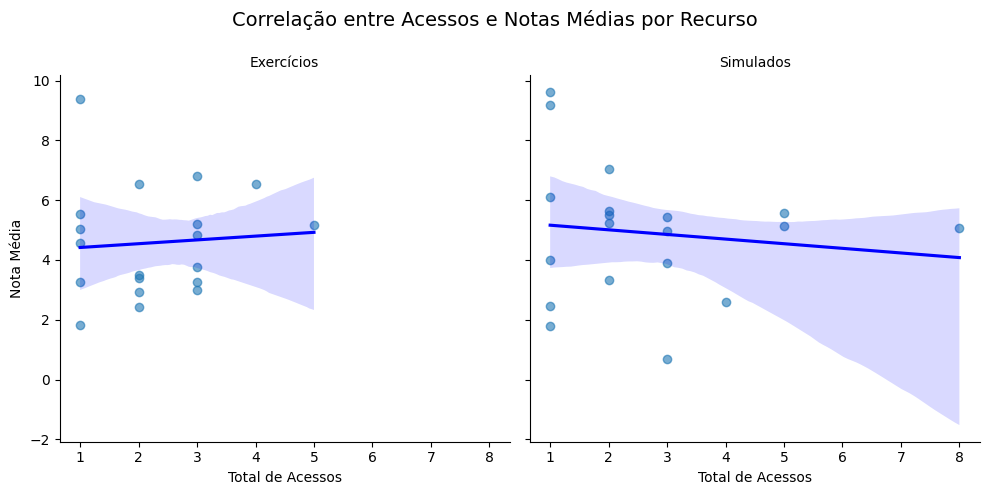

In [60]:
# Filtrar apenas os recursos "Simulados" e "Exerc√≠cios"
df_filtrado = df[df['Feature'].isin(['Simulados', 'Exerc√≠cios'])]

# Agrupar por estudante e recurso para contar acessos e calcular m√©dia de notas
df_acessos_notas = (
    df_filtrado.groupby(['Estudante', 'Feature'])
    .agg(acessos=('ID', 'count'), media_nota=('Nota', 'mean'))
    .reset_index()
)

# Criar os gr√°ficos separados para cada recurso
g = sns.lmplot(
    data=df_acessos_notas,
    x='acessos',
    y='media_nota',
    col='Feature',         # cria um gr√°fico para cada recurso
    height=5,
    aspect=1,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'blue'},
)

g.set_axis_labels("Total de Acessos", "Nota M√©dia")
g.set_titles("{col_name}")

plt.subplots_adjust(top=0.85)
plt.suptitle("Correla√ß√£o entre Acessos e Notas M√©dias por Recurso", fontsize=14)

plt.show()


J√° quando separamos Simulados e Exerc√≠cios, o gr√°fico de regress√£o linear mostra discrep√¢ncia no aproveitamento.

In [58]:
# Agrupar por recurso (Feature) para calcular total de acessos e nota m√©dia
tabela_recursos = (
    df.groupby('Feature')
    .agg(
        total_acessos=('ID', 'count'),
        nota_media=('Nota', 'mean')
    )
    .sort_values(by='total_acessos', ascending=False)
    .reset_index()
)

# Exibir a tabela inteira
display(tabela_recursos)


Feature  total_acessos  nota_media
0  Aulas Online             60         NaN
1     Simulados             50        4.72
2        Ebooks             47         NaN
3    Exerc√≠cios             43        4.65

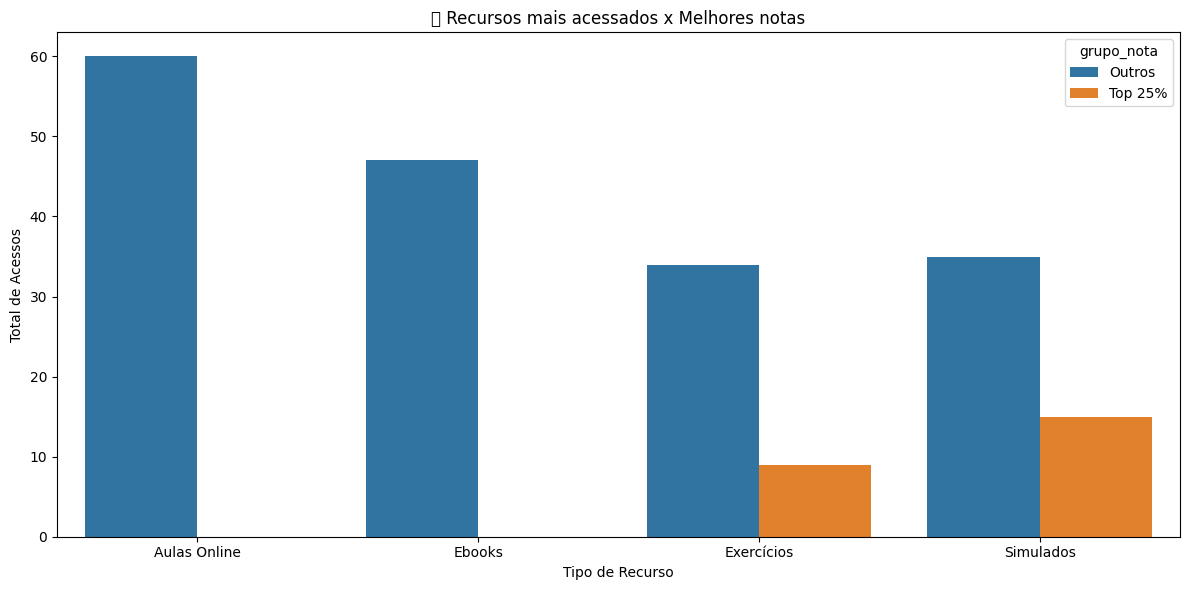

In [69]:
# Converter a coluna 'Nota' para num√©rico (caso ainda n√£o esteja)
df['Nota'] = pd.to_numeric(df['Nota'], errors='coerce')

# Calcular o percentil 75
nota_p75 = df['Nota'].quantile(0.75)

# Criar a coluna 'grupo_nota'
df['grupo_nota'] = df['Nota'].apply(lambda x: 'Top 25%' if x >= nota_p75 else 'Outros')

# Agrupar por grupo e tipo de recurso
recursos_por_grupo = df.groupby(['grupo_nota', 'Feature'])['ID'].count().reset_index()
recursos_por_grupo.rename(columns={'ID': 'total_acessos'}, inplace=True)

# Plotar gr√°fico
plt.figure(figsize=(12, 6))
sns.barplot(data=recursos_por_grupo, x='Feature', y='total_acessos', hue='grupo_nota')
plt.title('üìö Recursos mais acessados x Melhores notas')
plt.ylabel('Total de Acessos')
plt.xlabel('Tipo de Recurso')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


O gr√°fico mostra que os alunos com as melhores notas acessam somente exerc√≠cios e simulados.

Top regi√µes com notas baixas e muitos acessos:


Regi√£o  media_nota  total_acessos
4           Sul        3.15             42
1      Nordeste        4.28             34
0  Centro Oeste        4.99             29
2         Norte        5.02             49
3       Sudeste        5.69             46

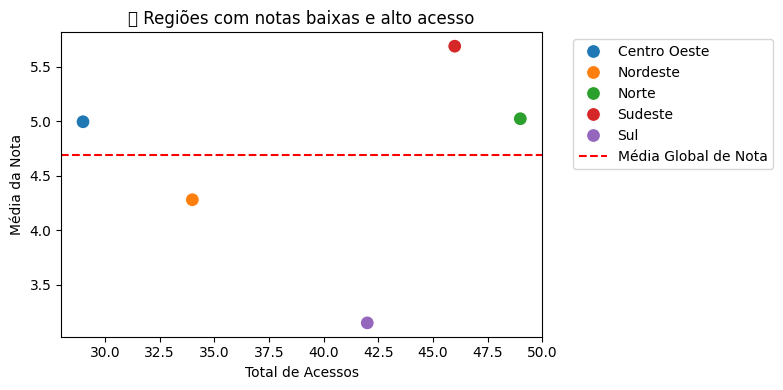

In [66]:
# Agrupando por Regi√£o
regiao_stats = df.groupby('Regi√£o').agg(
    media_nota=('Nota', 'mean'),
    total_acessos=('ID', 'count')
).reset_index()

# Ordenar pela m√©dia da nota ascendente e total de acessos descendente
regiao_stats_sorted = regiao_stats.sort_values(by=['media_nota', 'total_acessos'], ascending=[True, False])

# Exibir o top 10 das regi√µes com menor nota e maior acesso
print("Top regi√µes com notas baixas e muitos acessos:")
display(regiao_stats_sorted.head(10))

# Plotando
plt.figure(figsize=(8, 4))
sns.scatterplot(data=regiao_stats, x='total_acessos', y='media_nota', hue='Regi√£o', s=100)
plt.title('üìç Regi√µes com notas baixas e alto acesso')
plt.xlabel('Total de Acessos')
plt.ylabel('M√©dia da Nota')
plt.axhline(df['Nota'].mean(), color='red', linestyle='--', label='M√©dia Global de Nota')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


1. A Regi√£o Sul, apesar de uma m√©dia de acessos altos, tem obtido notas fracas o que pode indicar dificuldades pedag√≥gicas no aproveitamento dos recursos.

2. O Centro Oeste apesar de apresentar notas boas, n√£o tem um bom engajamento nos recursos o que pode demandar uma campanha para promover a utiliza√ß√£o dos recursos o a melhoria das condi√ßoes de acesso as ferramentas.

